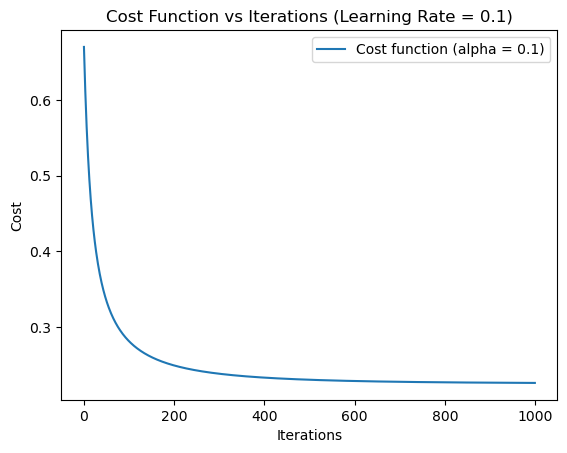

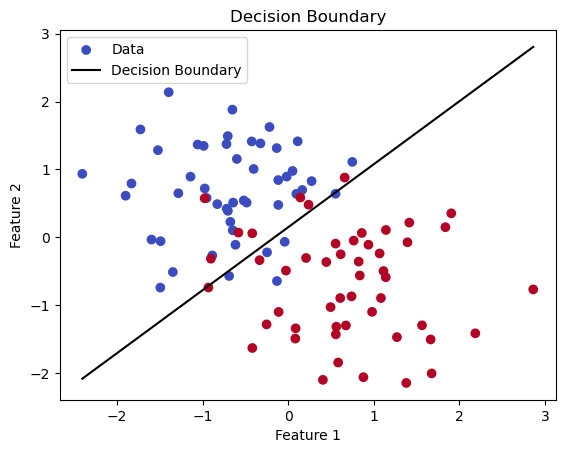

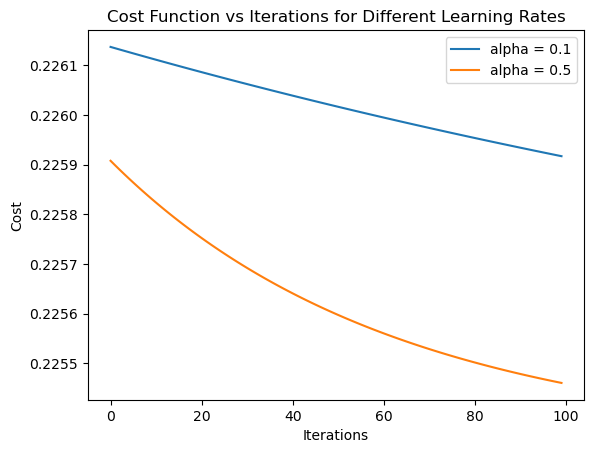

Confusion Matrix:
[[44  5]
 [ 7 43]]
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1-score: 0.8776
Learning Rate Used: 0.1
Final Cost Function Value after Convergence: 0.226140


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
X = pd.read_csv(r'C:\Users\KIIT\Desktop\archive\logisticX.csv').values  
y = pd.read_csv(r'C:\Users\KIIT\Desktop\archive\logisticY.csv').values   
def normalize_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = normalize_features(X)
X = np.hstack((np.ones((X.shape[0], 1)), X))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        theta -= (alpha / m) * X.T.dot(sigmoid(X.dot(theta)) - y)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history
alpha = 0.1
iterations = 1000
initial_theta = np.zeros((X.shape[1], 1))
theta, cost_history = gradient_descent(X, y, initial_theta, alpha, iterations)
plt.plot(range(len(cost_history)), cost_history, label='Cost function (alpha = 0.1)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations (Learning Rate = 0.1)')
plt.legend()
plt.show()
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='coolwarm', label='Data')
x_values = np.array([min(X[:, 1]), max(X[:, 1])])
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()
alphas = [0.1, 0.5]
cost_histories = []
for a in alphas:
    _, cost_hist = gradient_descent(X, y, initial_theta, a, 100)
    cost_histories.append(cost_hist)
plt.figure()
for i, a in enumerate(alphas):
    plt.plot(range(len(cost_histories[i])), cost_histories[i], label=f'alpha = {a}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()
y_pred = (sigmoid(X.dot(theta)) >= 0.5).astype(int)
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Learning Rate Used: {alpha}')
print(f'Final Cost Function Value after Convergence: {cost_history[-1]:.6f}')

